In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

xls = pd.ExcelFile('EPIC.xlsx')
patients = pd.read_excel(xls, 'Patients')
admissions = pd.read_excel(xls, 'Admissions')
icu_stays = pd.read_excel(xls, 'ICU_Stays')
bypass_surgeries = pd.read_excel(xls, 'Bypass_Surgeries')
hemoblobin = pd.read_excel(xls, 'Haemoglobins')
transfusion = pd.read_excel(xls, 'Transfusions')

In [119]:
patients

,PATIENT_NUMBER,DOB,Gender
0,31,1950-04-22,M
1,73,1967-06-29,M
2,255,1956-12-03,M
3,12,1964-01-20,M
4,44,1975-03-11,M
...,...,...,...
263,170,1949-11-29,M
264,248,1940-05-29,M
265,80,1965-02-20,M
266,211,1954-12-08,M


- patients:
'PATIENT_NUMBER', 'DOB', 'Gender'
- admissions:
'ADMISSION_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_TIME',
       'DISCHARGE_TIME'
- icu_stays:
'data', 'PATIENT_NUMBER', 'ADMISSION_NUMBER',
       'ICU_START_TIME', 'ICU_END_TIME'
- bypass_surgeries:
'SURGERY_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'START_TIME',
       'FINISH_TIME']
- hemoblobin:
'HAEMOGLOBIN_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'RESULT',
       'REFERENCE_LOW', 'REFERENCE_HIGH', 'REFERENCE_UNIT',
       'SPECIMEN_TAKEN_TIME', 'RESULT_TIME']
- transfusion:
'TRANSFUSION_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'VOLUME',
       'BLOOD_START_TIME', 'BLOOD_END_TIME'
       
patient_number= subject_id
admission_number = hamd_id

In [120]:
admission_patient = admissions.merge(patients, how = 'left', on='PATIENT_NUMBER')
admission_patient['ADMISSION_TIME'] = pd.to_datetime(admission_patient['ADMISSION_TIME'])
admission_patient['DISCHARGE_TIME'] = pd.to_datetime(admission_patient['DISCHARGE_TIME'])
admission_patient['hosp_stay_time'] = (admission_patient['DISCHARGE_TIME'] - admission_patient['ADMISSION_TIME']).dt.seconds/3600
admission_patient_format = admission_patient.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
admission_patient_format

,hadm_id,PATIENT_NUMBER,ADMISSION_TIME,DISCHARGE_TIME,DOB,gender,hosp_stay_time
0,1,8,2021-07-01 19:00:00,2021-07-14 14:34:00,1944-09-10,F,19.566667
1,2,268,2021-05-27 02:36:00,2021-06-27 15:03:00,1965-04-20,M,12.450000
2,3,4,2021-07-30 08:42:00,2021-08-05 15:36:00,1952-09-11,M,6.900000
3,4,146,2021-05-26 18:45:00,2021-06-01 18:33:00,1954-02-12,M,23.800000
4,5,153,2022-04-28 06:19:00,2022-04-28 13:35:00,1959-10-04,M,7.266667
...,...,...,...,...,...,...,...
263,261,26,2022-03-30 23:33:00,2022-04-14 13:15:00,1946-04-28,M,13.700000
264,262,104,2021-09-22 08:36:00,2021-10-04 13:02:00,1952-09-05,M,4.433333
265,263,82,2022-10-10 15:18:00,2022-10-14 20:30:00,1946-04-12,F,5.200000
266,264,245,2022-04-27 16:49:00,2022-05-14 15:10:00,1959-01-10,M,22.350000


In [123]:

def histplot_hosp_stay_time(df,name):
    
    female_df = df.loc[df.gender == 'F' ].hosp_stay_time
    male_df = df.loc[df.gender == 'M' ].hosp_stay_time
    plt.hist(male_df,  weights=np.ones_like(male_df) / len(male_df), edgecolor="black",label= f"male | {len(df.loc[df.gender == 'M'])}")
    plt.hist(female_df, weights=np.ones_like(female_df) / len(female_df), edgecolor="black",label= f"female | {len(df.loc[df.gender == 'F'])}")
    plt.xlabel("Hospital stay length in days")
    plt.ylabel("Number of Patient")
    plt.title("Distribution of Hospital stay length")
    plt.legend()

    plt.savefig(f'Additional_CABG_plots/{name}_histplot_hosp_stay_time_gender.png')
    plt.show()

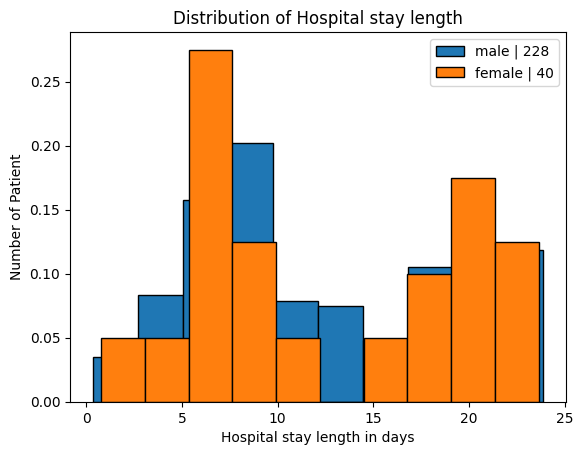

In [124]:
histplot_hosp_stay_time(admission_patient_format,"EPIC")

#### Analysis for packed red cell
- blood transfusion totalamountuom distribution
- blood transfusion count distribution


In [131]:
def histplot_bloodtransfusion_volume(packed_red_cells,name):
    female = packed_red_cells.loc[packed_red_cells.gender == 'F' ].totalamount
    male = packed_red_cells.loc[packed_red_cells.gender == 'M' ].totalamount
    plt.hist(male,  weights=np.ones_like(male) / len(male), edgecolor="black",label= f"male | {len(packed_red_cells.loc[packed_red_cells.gender == 'M'])}")
    plt.hist(female, weights=np.ones_like(female) / len(female), edgecolor="black",label= f"female | {len(packed_red_cells.loc[packed_red_cells.gender == 'F'])}")
    plt.title("Distribution of blood transfusion totalamount")
    plt.ylabel("density")
    plt.xlabel("Blood transfusion totalamount")
    plt.legend()
    plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_bloodtransfusion_volume.png')
    plt.show()


In [132]:

    
def histplot_bloodtransfusion_counts(packed_red_cells,name):
    
    female = packed_red_cells.loc[packed_red_cells.gender == 'F' ].counts
    male = packed_red_cells.loc[packed_red_cells.gender == 'M' ].counts
    plt.hist(male,  weights=np.ones_like(male) / len(male), edgecolor="black",label= f"male | {len(packed_red_cells.loc[packed_red_cells.gender == 'M'])}")
    plt.hist(female, weights=np.ones_like(female) / len(female), edgecolor="black",label= f"female | {len(packed_red_cells.loc[packed_red_cells.gender == 'F'])}")
    

    plt.legend(prop={'size': 12})
    plt.title('Distribution of number of blood transfusion')
    plt.xlabel('Number of blood transfusion')
    plt.ylabel('Density')
    plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_numberOfbloodTransfusion_gender.png')
    plt.show()

def boxplot_bloodtransfusion_counts(blood_transfusion_count,name):
    sns.boxplot(x="gender", y='counts', data=blood_transfusion_count)
    plt.title("Number of blood transfusion")
    plt.ylabel('Number of blood transfusion')
    plt.savefig(f'Bloodtransfusion_plots/{name}_boxplot_numberOfbloodTransfusion_gender.png')
    plt.show()
    

In [133]:
transfusion_patient = transfusion.merge(patients, how = 'left', on='PATIENT_NUMBER')
transfusion_patient.loc[transfusion_patient.BLOOD_START_TIME == "Null", 'BLOOD_END_TIME'] = transfusion_patient.BLOOD_START_TIME
transfusion_patient_format = transfusion_patient.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender", "VOLUME": "totalamount", "BLOOD_START_TIME": "starttime"}, errors="raise")

transfusion_patient

,TRANSFUSION_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,VOLUME,BLOOD_START_TIME,BLOOD_END_TIME,DOB,Gender
0,1,93,45,305.00,2022-04-13 21:16:00,2022-04-13 21:21:00,1952-07-14,F
1,2,90,239,325.60,2021-04-13 05:53:00,2021-04-13 09:35:00,1951-05-18,M
2,3,93,45,268.00,2022-04-16 09:37:00,2022-04-16 12:00:00,1952-07-14,F
3,4,139,105,263.00,2022-04-02 09:55:00,2022-04-02 12:51:00,1950-07-13,M
4,5,99,207,255.00,2021-12-07 20:00:00,2021-12-07 20:20:00,1944-02-19,M
...,...,...,...,...,...,...,...,...
258,253,93,45,260.00,2022-04-18 16:25:00,2022-04-18 18:25:00,1952-07-14,F
259,254,93,45,260.00,2022-04-27 11:22:00,2022-04-27 11:27:00,1952-07-14,F
260,255,76,175,250.00,2021-08-31 17:50:00,2021-08-31 18:51:00,1966-08-11,M
261,256,90,239,496.00,2021-04-11 17:17:00,2021-04-11 20:00:00,1951-05-18,M


In [134]:
# df = transfusion_patient
# meanf = df.loc[df.Gender == 'F' ].VOLUME.mean()
# meanm = df.loc[df.Gender == 'M' ].VOLUME.mean()
# meanf - meanm
transfusion_patient_format


,TRANSFUSION_NUMBER,PATIENT_NUMBER,hadm_id,totalamount,starttime,BLOOD_END_TIME,DOB,gender
0,1,93,45,305.00,2022-04-13 21:16:00,2022-04-13 21:21:00,1952-07-14,F
1,2,90,239,325.60,2021-04-13 05:53:00,2021-04-13 09:35:00,1951-05-18,M
2,3,93,45,268.00,2022-04-16 09:37:00,2022-04-16 12:00:00,1952-07-14,F
3,4,139,105,263.00,2022-04-02 09:55:00,2022-04-02 12:51:00,1950-07-13,M
4,5,99,207,255.00,2021-12-07 20:00:00,2021-12-07 20:20:00,1944-02-19,M
...,...,...,...,...,...,...,...,...
258,253,93,45,260.00,2022-04-18 16:25:00,2022-04-18 18:25:00,1952-07-14,F
259,254,93,45,260.00,2022-04-27 11:22:00,2022-04-27 11:27:00,1952-07-14,F
260,255,76,175,250.00,2021-08-31 17:50:00,2021-08-31 18:51:00,1966-08-11,M
261,256,90,239,496.00,2021-04-11 17:17:00,2021-04-11 20:00:00,1951-05-18,M


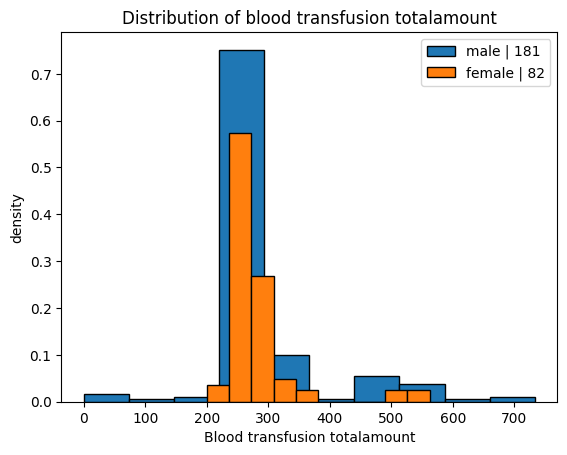

In [135]:
histplot_bloodtransfusion_volume(transfusion_patient_format,"EPIC")

In [136]:
blood_transfusion_count = transfusion_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='counts')
#blood_transfusion_count = blood_transfusion_count.merge(transfusion_patient, how = 'inner', on='ADMISSION_NUMBER')
#blood_transfusion_count = blood_transfusion_count.merge(patients, how = 'left', on='PATIENT_NUMBER')
#hadm_id	gender	counts
blood_transfusion_count_format = blood_transfusion_count.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
#blood_transfusion_count = blood_transfusion_count.sort_values(by='Gender')
blood_transfusion_count

,ADMISSION_NUMBER,Gender,counts
0,2,M,5
1,8,M,2
2,12,M,1
3,16,M,3
4,18,M,1
...,...,...,...
72,249,M,1
73,252,M,1
74,257,F,2
75,259,M,1


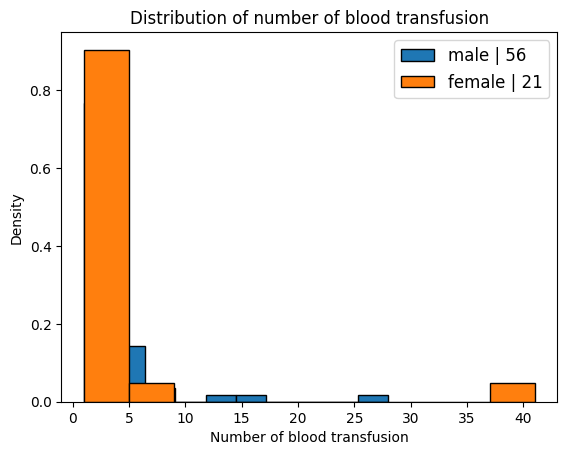

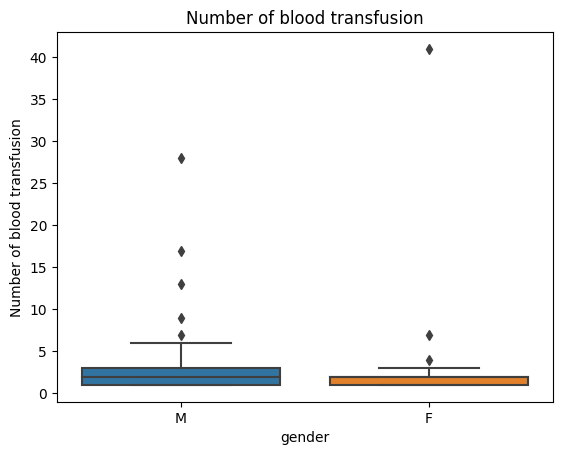

In [137]:
histplot_bloodtransfusion_counts(blood_transfusion_count_format,"EPIC")
boxplot_bloodtransfusion_counts(blood_transfusion_count_format,"EPIC")

#### Labevent analysis
- example as hemoglobin and can be applied to other labevent
    - step1: get csv file from sql: just change the line95 in INR(PT) query to any other labevent label name

    - step2: run function get_EDA(INR_PT,"INR_PT") where INR_PT is the dataframe read from csv file and "INR_PT" is labevent label name
- measurements that pointed out by clinician collected and shown in the dataframe

- correlation between value measurements (scatterplot)
    - value diff vs pretransfusion
    - value diff vs posttransfusion  
- value measurements under different number of blood transfusion (boxplot,distribution(with and without gender feature))
    - pretransfusion 
    - posttransfusion   
- value measurements vs time measurements (scatterplot)
    - posttransfusion vs time between posttransfusion and first blood transfusion
    - pretransfusion vs time between pretransfusion and first blood transfusion
    - value diff vs time between posttransfusion and pretransfusion
    - value diff vs time between pretransfusion and first blood transfusion
- time measurement distribution (distribution, boxplot)
    - time between irst blood transfusion and posttransfusion
    - time between pretransfusion and first blood transfusion
    
##### Note additional preprocess for hemoglobin
- Hemoglobin measurements from two table labevents and charevents
- But 4552 of the 4574 measurements in charevent are duplicates with labevent, which means we only get 22 more records
    

### This PART is inside epic_hemoglobin
-----

### Additional analysis on value under different number of blood transfusion
- number of procedures taken
- icu stay time
- number of times enter icu


#### number of procedures taken

#### Icu stay time


In [11]:
def boxplot_icu_stay_time(icu_stay_time_blood_counts,name):
    
    plt.figure(figsize=(7,7))
    sns.boxplot(data=icu_stay_time_blood_counts, y="icu_stay_time")
    #sns.histplot(data=icu_stay_time_blood_counts, x="icu_stay_time")
    plt.title("Icu stay time distribution")
    plt.savefig(f'Additional_CABG_plots/{name}_boxtplot_icu_stay_time.png')
    plt.show()

In [12]:
def boxplots_icu_stay_time_bloodtransfusion(icu_stay_time_blood_counts,name):
    
    plt.figure(figsize=(7,7))
    sns.boxplot(data=icu_stay_time_blood_counts, x="counts", y="icu_stay_time")
    plt.title("Boxplot for icu stay time under different number of blood transfusion")
    plt.savefig(f'Additional_CABG_plots/{name}_boxplot_icu_stay_time_bloodtransfusion.png')
    plt.show()

In [13]:
def boxplots_enter_icu__time_bloodtransfusion(enter_icu_timesblood_counts,name):
    plt.figure(figsize=(7,7))
    sns.boxplot(data=enter_icu_timesblood_counts, x="number_of_enter_icu", y="counts")
    plt.title("Boxplot for number of blood transfusion under different times of entering icu")
    plt.savefig(f'Additional_CABG_plots/{name}_boxplot_enter_icu_times_bloodtransfusion.png')
    plt.show()

In [14]:
#icu_stays_patient
icu_stays_noicunumber=icu_stays.drop(columns=['ICU_STAY_NUMBER'])
# there is some duplicate rows 
icu_stays_noicunumber = icu_stays_noicunumber.drop_duplicates()
icu_stays_noicunumber

,PATIENT_NUMBER,ADMISSION_NUMBER,ICU_START_TIME,ICU_END_TIME
0,39,110,2021-07-05 13:14:00,2021-07-07 15:49:00
4,56,252,2021-02-24 16:25:00,2021-02-26 13:12:00
8,118,96,2021-09-30 14:55:00,2021-10-01 15:31:00
11,219,233,2021-06-10 13:12:00,2021-06-11 17:16:00
14,268,2,2021-06-19 14:54:00,2021-06-22 17:41:00
...,...,...,...,...
848,247,219,2022-07-14 16:08:00,2022-07-15 13:16:00
851,154,119,2022-02-08 13:55:00,2022-02-09 14:25:00
854,139,105,2022-03-29 18:40:00,2022-03-30 13:39:00
857,37,154,2022-03-10 13:39:00,2022-03-11 13:58:00


In [15]:
icu_stays_patient = icu_stays_noicunumber.merge(patients, how = 'left', on='PATIENT_NUMBER')
icu_stays_patient['ICU_START_TIME'] = pd.to_datetime(icu_stays_patient['ICU_START_TIME'])
icu_stays_patient['ICU_END_TIME'] = pd.to_datetime(icu_stays_patient['ICU_END_TIME'])
icu_stays_patient['icu_stay_time'] = (icu_stays_patient['ICU_END_TIME'] - icu_stays_patient['ICU_START_TIME']).dt.seconds/3600
icu_total_stay_format = icu_stays_patient.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
icu_total_stay_format

,PATIENT_NUMBER,hadm_id,ICU_START_TIME,ICU_END_TIME,DOB,gender,icu_stay_time
0,39,110,2021-07-05 13:14:00,2021-07-07 15:49:00,1945-07-08,M,2.583333
1,56,252,2021-02-24 16:25:00,2021-02-26 13:12:00,1952-03-03,M,20.783333
2,118,96,2021-09-30 14:55:00,2021-10-01 15:31:00,1945-12-29,M,0.600000
3,219,233,2021-06-10 13:12:00,2021-06-11 17:16:00,1946-05-03,M,4.066667
4,268,2,2021-06-19 14:54:00,2021-06-22 17:41:00,1965-04-20,M,2.783333
...,...,...,...,...,...,...,...
175,247,219,2022-07-14 16:08:00,2022-07-15 13:16:00,1951-01-18,M,21.133333
176,154,119,2022-02-08 13:55:00,2022-02-09 14:25:00,1950-07-14,F,0.500000
177,139,105,2022-03-29 18:40:00,2022-03-30 13:39:00,1950-07-13,M,18.983333
178,37,154,2022-03-10 13:39:00,2022-03-11 13:58:00,1987-06-15,F,0.316667


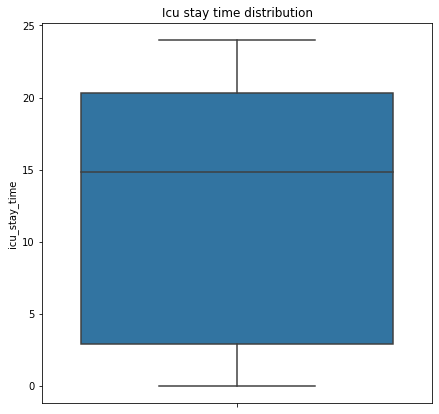

In [16]:
boxplot_icu_stay_time(icu_total_stay_format,"EPIC")

In [17]:
icu_stays_patient_bloodtransfusion = icu_stays_patient.merge(blood_transfusion_count, how = 'inner', on=['ADMISSION_NUMBER','Gender'])
icu_stays_patient_bloodtransfusionformat = icu_stays_patient_bloodtransfusion.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
icu_stays_patient_bloodtransfusion

,PATIENT_NUMBER,ADMISSION_NUMBER,ICU_START_TIME,ICU_END_TIME,DOB,Gender,icu_stay_time,counts
0,56,252,2021-02-24 16:25:00,2021-02-26 13:12:00,1952-03-03,M,20.783333,1
1,268,2,2021-06-19 14:54:00,2021-06-22 17:41:00,1965-04-20,M,2.783333,5
2,231,142,2021-08-05 14:32:00,2021-08-19 12:01:00,1972-11-02,M,21.483333,2
3,115,26,2021-09-12 07:00:00,2021-09-18 17:48:00,1946-04-22,M,10.800000,2
4,21,113,2021-04-01 13:41:00,2021-04-02 18:51:00,1965-03-26,M,5.166667,1
...,...,...,...,...,...,...,...,...
64,101,208,2022-04-27 14:51:00,2022-04-29 12:33:00,1957-01-14,M,21.700000,2
65,16,69,2022-07-07 18:47:00,2022-07-09 13:48:00,1940-11-21,M,19.016667,6
66,85,69,2022-07-28 18:47:00,2022-07-30 13:48:00,1940-12-12,M,19.016667,6
67,154,119,2022-02-08 13:55:00,2022-02-09 14:25:00,1950-07-14,F,0.500000,1


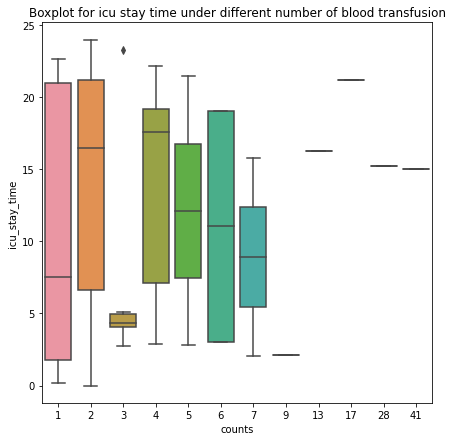

In [18]:
boxplots_icu_stay_time_bloodtransfusion(icu_stays_patient_bloodtransfusion,"EPIC")

In [19]:
icu_stays_times = icu_stays_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='number_of_enter_icu')
icu_stays_times

,ADMISSION_NUMBER,Gender,number_of_enter_icu
0,1,F,1
1,2,M,1
2,3,M,1
3,6,M,1
4,8,M,1
...,...,...,...
167,259,M,1
168,260,M,1
169,261,M,1
170,262,M,1


In [20]:
icu_stays_times = icu_stays_times.merge(blood_transfusion_count, how = 'inner', on='ADMISSION_NUMBER')
icu_stays_timesformat = icu_stays_times.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
icu_stays_times

,ADMISSION_NUMBER,Gender_x,number_of_enter_icu,Gender_y,counts
0,2,M,1,M,5
1,8,M,1,M,2
2,16,M,1,M,3
3,19,M,1,M,1
4,22,M,1,M,9
...,...,...,...,...,...
58,249,M,1,M,1
59,252,M,1,M,1
60,257,F,1,F,2
61,259,M,1,M,1


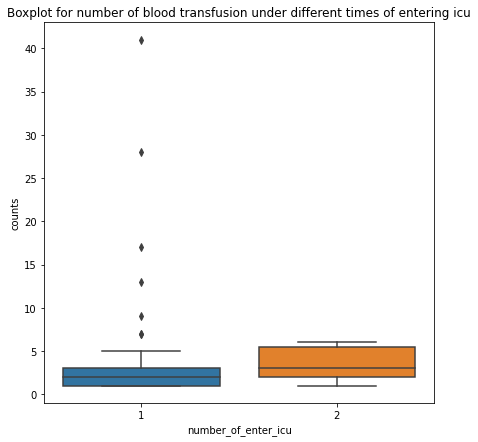

In [21]:
boxplots_enter_icu__time_bloodtransfusion(icu_stays_timesformat,"EPIC")

In [22]:
icu_total_stay=icu_stays_patient.groupby(['ADMISSION_NUMBER','Gender'])['icu_stay_time'].agg(icu_stay_time='sum')
#icu_total_stay = icu_total_stay.merge(icu_stays_patient, how = 'left', on='ADMISSION_NUMBER')
#icu_total_stay = icu_total_stay.merge(blood_transfusion_count, how = 'left', on='ADMISSION_NUMBER')
icu_total_stay = icu_total_stay.merge(blood_transfusion_count, how = 'inner', on='ADMISSION_NUMBER')

icu_total_stay_format = icu_total_stay.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
#hadm_id	icu_stay_time	gender	counts
icu_total_stay

,ADMISSION_NUMBER,icu_stay_time,Gender,counts
0,2,2.783333,M,5
1,8,0.650000,M,2
2,16,5.066667,M,3
3,19,2.283333,M,1
4,22,2.116667,M,9
...,...,...,...,...
58,249,17.083333,M,1
59,252,20.783333,M,1
60,257,6.633333,F,2
61,259,1.200000,M,1


In [23]:
bypass_surgeries
bypass_surgeries_patient = bypass_surgeries.merge(patients, how = 'left', on='PATIENT_NUMBER')
bypass_surgeries_patient

,SURGERY_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,START_TIME,FINISH_TIME,DOB,Gender
0,1,111,111,2022-08-08 10:53:56,2022-08-08 16:19:00,1956-09-25,M
1,2,159,103,2021-06-16 12:57:19,2021-06-16 15:50:09,1965-11-05,M
2,3,191,161,2022-03-08 09:49:06,2022-03-08 15:54:00,1963-12-25,M
3,4,231,142,2021-08-05 09:11:26,2021-08-05 13:59:18,1972-11-02,M
4,5,122,77,2022-10-03 08:53:00,2022-10-03 14:22:30,1954-09-07,M
...,...,...,...,...,...,...,...
269,264,37,154,2022-03-10 08:49:05,2022-03-10 13:25:33,1987-06-15,F
270,265,28,199,2021-11-24 08:54:31,2021-11-24 13:52:25,1948-09-25,M
271,266,211,114,2022-09-01 08:50:00,2022-09-01 13:22:00,1954-12-08,M
272,267,110,152,2021-09-29 14:15:00,2021-09-29 17:35:00,1958-09-28,M


In [24]:
bypass_surgeries_patient = bypass_surgeries_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='procedure_counts')
bypass_surgeries_patient

,ADMISSION_NUMBER,Gender,procedure_counts
0,1,F,1
1,2,M,1
2,3,M,1
3,4,M,1
4,5,M,1
...,...,...,...
260,261,M,1
261,262,M,1
262,263,F,1
263,264,M,1


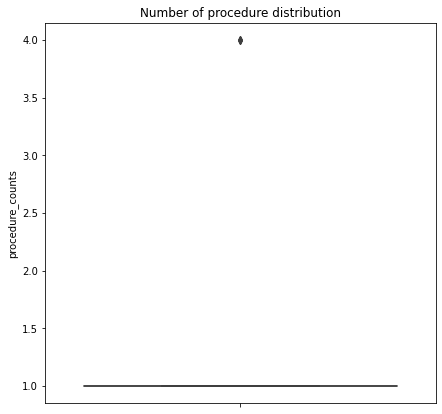

In [26]:
plt.figure(figsize=(7,7))
sns.boxplot(data=bypass_surgeries_patient, y="procedure_counts")
plt.title("Number of procedure distribution")
plt.savefig(f'Additional_CABG_plots/EPIC_boxplots_number_of_procedure.png')
plt.show()
#plt.title('For drugs, proportion of patientunder three groups')